In [2]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv("train_ready_for_model.csv")

In [4]:
test = pd.read_csv("test_ready_for_model.csv")

In [5]:
result = test[["User_ID","Product_ID"]]

In [6]:
result["Purchase"] = train.Purchase.mean()

In [7]:
result.to_csv("result1.csv",index=False)

In [1]:
#Define target and ID columns:
target = 'Purchase'
IDcol = ['User_ID','Product_ID']
from sklearn import cross_validation, metrics

def modelfit(alg, dtrain, , predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Perform cross-validation:
    cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain[target], cv=20, scoring='mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print("\nModel Report")
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)


C:\Users\AADHI\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
from sklearn.linear_model import LinearRegression
predictors = [x for x in train.columns if x not in [target]+IDcol]
print("predictors : ",predictors)
# print predictors
alg1 = LinearRegression(normalize=True)
modelfit(alg1, train, test, predictors, target, IDcol, 'result2.csv')
coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

NameError: name 'train' is not defined

predictors :  ['Gender_F', 'Gender_M', 'Age_0-17', 'Age_18-25', 'Age_26-35', 'Age_36-45', 'Age_46-50', 'Age_51-55', 'Age_55+', 'City_Category_A', 'City_Category_B', 'City_Category_C', 'Stay_In_Current_City_Years_0', 'Stay_In_Current_City_Years_1', 'Stay_In_Current_City_Years_2', 'Stay_In_Current_City_Years_3', 'Stay_In_Current_City_Years_4+', 'Product_Id_Pattern_P000', 'Product_Id_Pattern_P001', 'Product_Id_Pattern_P002', 'Product_Id_Pattern_P003', 'Product_Id_Pattern_P009', 'Marital_Status', 'Occupation', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']


C:\Users\AADHI\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\AADHI\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\AADHI\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\AADHI\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\AADHI\Anaconda3\lib\sit


Model Report
RMSE : 4669


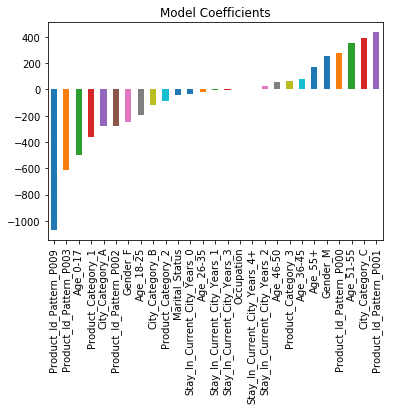

In [18]:
from sklearn.linear_model import Ridge
predictors = [x for x in train.columns if x not in [target]+IDcol]
print("predictors : ",predictors)
# print predictors
alg1 = Ridge(alpha = 0.1,normalize=True)
modelfit(alg1, train, test, predictors, target, IDcol, 'res3.csv')
coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

C:\Users\AADHI\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\AADHI\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\AADHI\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\AADHI\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\AADHI\Anaconda3\lib\sit


Model Report
RMSE : 4775


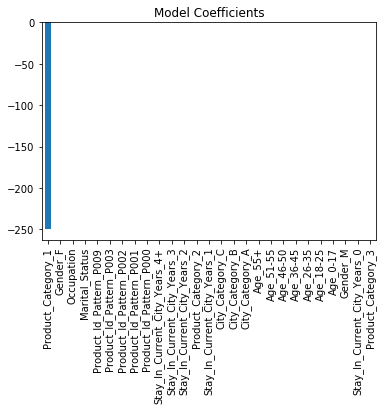

In [19]:
from sklearn.linear_model import Lasso
predictors = [x for x in train.columns if x not in [target]+IDcol]
# print predictors
alg1 = Lasso(alpha = 1,normalize=True)
modelfit(alg1, train, test, predictors, target, IDcol, 'res4.csv')
coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

C:\Users\AADHI\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\AADHI\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\AADHI\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\AADHI\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\AADHI\Anaconda3\lib\sit


Model Report
RMSE : 4667


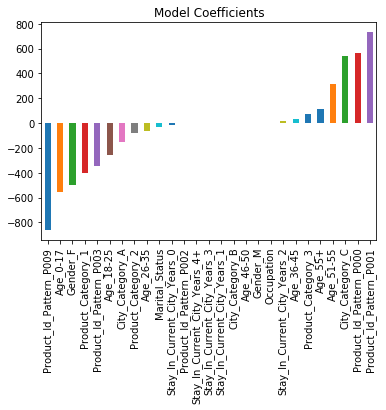

In [20]:
from sklearn.linear_model import ElasticNet
predictors = [x for x in train.columns if x not in [target]+IDcol]
# print predictors
alg1 = ElasticNet(alpha=0.01,l1_ratio=1,normalize=True)
modelfit(alg1, train, test, predictors, target, IDcol, 'res5.csv')
coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

In [1]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
# print predictors
for i in range(1,5):
    alg1 = KNeighborsRegressor(n_neighbors=i)
    modelfit(alg1, train, test, predictors, target, IDcol, 'res6.csv')

In [9]:
from sklearn.tree import DecisionTreeRegressor

In [10]:
from sklearn.tree import DecisionTreeRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
# print predictors
alg1 = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(alg1, train, test, predictors, target, IDcol, 'decisionres7.csv')
#coef1 = pd.Series(alg1.coef_, predictors).sort_values()
#coef1.plot(kind='bar', title='Model Coefficients')


Model Report
RMSE : 2842


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
# print predictors
alg1 = RandomForestRegressor(n_estimators=500,max_depth=20, min_samples_leaf=100)
modelfit(alg1, train, test, predictors, target, IDcol, 'Randomres8.csv')
#coef1 = pd.Series(alg1.coef_, predictors).sort_values()
#coef1.plot(kind='bar', title='Model Coefficients')